In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Load the data
data = pd.read_csv('eurusd.csv')

In [3]:
data

,time,open,high,low,close,tick_volume,spread,real_volume,HH_LL_Label
0,2023-09-01 00:00:00,1.08342,1.08378,1.08342,1.08378,7,67,0,HH
1,2023-09-01 00:05:00,1.08378,1.08404,1.08371,1.08399,83,50,0,HH
2,2023-09-01 00:10:00,1.08399,1.08405,1.08394,1.08398,384,46,0,HH
3,2023-09-01 00:15:00,1.08398,1.08405,1.08394,1.08405,17,48,0,HH
4,2023-09-01 00:20:00,1.08405,1.08415,1.08402,1.08415,38,38,0,LL
...,...,...,...,...,...,...,...,...,...
59610,2024-06-19 23:30:00,1.07427,1.07430,1.07426,1.07426,15,20,0,HH
59611,2024-06-19 23:35:00,1.07426,1.07427,1.07426,1.07426,19,21,0,HH
59612,2024-06-19 23:40:00,1.07426,1.07428,1.07425,1.07426,43,19,0,HH
59613,2024-06-19 23:45:00,1.07427,1.07429,1.07427,1.07427,16,20,0,HH


In [4]:
data.shape

(59615, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59615 entries, 0 to 59614
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         59615 non-null  object 
 1   open         59615 non-null  float64
 2   high         59615 non-null  float64
 3   low          59615 non-null  float64
 4   close        59615 non-null  float64
 5   tick_volume  59615 non-null  int64  
 6   spread       59615 non-null  int64  
 7   real_volume  59615 non-null  int64  
 8   HH_LL_Label  59615 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.1+ MB


In [6]:
data.describe()

,open,high,low,close,tick_volume,spread,real_volume
count,59615.000000,59615.000000,59615.000000,59615.000000,59615.000000,59615.000000,59615.0
mean,1.078362,1.078511,1.078211,1.078361,232.275350,17.454886,0.0
std,0.012784,0.012778,0.012790,0.012784,190.869322,3.909278,0.0
min,1.044910,1.045290,1.044740,1.044900,3.000000,16.000000,0.0
25%,1.070210,1.070350,1.070060,1.070210,104.000000,16.000000,0.0
50%,1.079450,1.079570,1.079310,1.079450,191.000000,16.000000,0.0
75%,1.087320,1.087460,1.087190,1.087320,302.000000,18.000000,0.0
max,1.113580,1.113860,1.113460,1.113570,2135.000000,144.000000,0.0


In [7]:
# Check for missing values
missing_values = data.isnull().sum()   ### their is no null values
print(missing_values)

time           0
open           0
high           0
low            0
close          0
tick_volume    0
spread         0
real_volume    0
HH_LL_Label    0
dtype: int64


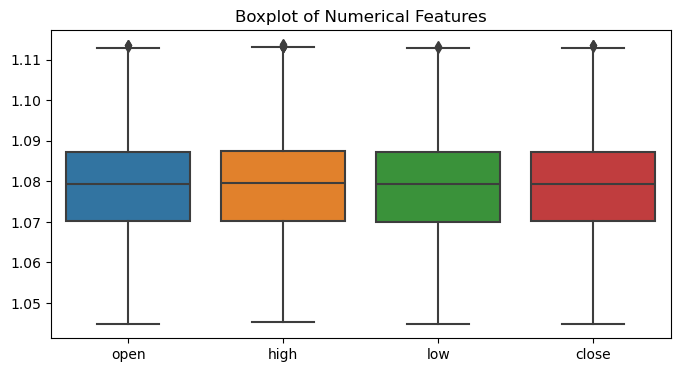

In [8]:
# Boxplot for outlier detection     ### data set not conatin outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=data[['open', 'high', 'low', 'close']])
plt.title('Boxplot of Numerical Features')
plt.show()

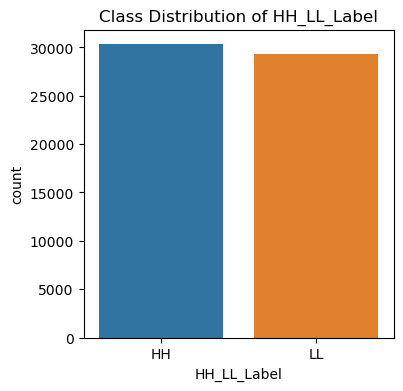

In [9]:
# Countplot of target variable
plt.figure(figsize=(4, 4))
sns.countplot(x='HH_LL_Label', data=data)    ### dataset is balance
plt.title('Class Distribution of HH_LL_Label')
plt.show()

In [10]:
# Check if 'real_volume' column contains only zeros
if 'real_volume' in data.columns:
    if (data['real_volume'] == 0).all():
        data.drop('real_volume', axis=1, inplace=True)
        print("Removed 'real_volume' column as it contains only zeros.")

Removed 'real_volume' column as it contains only zeros.


In [11]:
# Convert 'time' to datetime format
data['time'] = pd.to_datetime(data['time'])

In [12]:
# Extract time features
data['hour_of_day'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.dayofweek

In [13]:
# Drop 'time' column
data.drop('time', axis=1, inplace=True)

In [14]:
# Encode categorical target variable
le = LabelEncoder()
data['HH_LL_Label'] = le.fit_transform(data['HH_LL_Label'])

In [23]:
# Split data into features (X) and target variable (y)
X = data.drop('HH_LL_Label', axis=1)
y = data['HH_LL_Label']

In [35]:
X

,open,high,low,close,tick_volume,spread,hour_of_day,day_of_week,rolling_mean_5,rolling_mean_10,...,high_lag_3,low_lag_1,low_lag_2,low_lag_3,close_lag_1,close_lag_2,close_lag_3,spread_lag_1,spread_lag_2,spread_lag_3
9,1.08400,1.08403,1.08399,1.08402,19,34,0,4,1.084072,1.084031,...,1.08426,1.08400,1.08407,1.08405,1.08400,1.08412,1.08408,30.0,34.0,30.0
10,1.08402,1.08406,1.08398,1.08403,12,35,0,4,1.084050,1.084056,...,1.08413,1.08399,1.08400,1.08407,1.08402,1.08400,1.08412,34.0,30.0,34.0
11,1.08403,1.08403,1.08399,1.08403,9,41,0,4,1.084040,1.084060,...,1.08414,1.08398,1.08399,1.08400,1.08403,1.08402,1.08400,35.0,34.0,30.0
12,1.08406,1.08422,1.08406,1.08417,30,23,1,4,1.084050,1.084079,...,1.08403,1.08399,1.08398,1.08399,1.08403,1.08403,1.08402,41.0,35.0,34.0
13,1.08417,1.08423,1.08417,1.08417,22,18,1,4,1.084084,1.084091,...,1.08406,1.08406,1.08399,1.08398,1.08417,1.08403,1.08403,23.0,41.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59610,1.07427,1.07430,1.07426,1.07426,15,20,23,2,1.074334,1.074359,...,1.07442,1.07426,1.07431,1.07438,1.07427,1.07433,1.07441,20.0,19.0,19.0
59611,1.07426,1.07427,1.07426,1.07426,19,21,23,2,1.074306,1.074347,...,1.07439,1.07426,1.07426,1.07431,1.07426,1.07427,1.07433,20.0,20.0,19.0
59612,1.07426,1.07428,1.07425,1.07426,43,19,23,2,1.074276,1.074329,...,1.07434,1.07426,1.07426,1.07426,1.07426,1.07426,1.07427,21.0,20.0,20.0
59613,1.07427,1.07429,1.07427,1.07427,16,20,23,2,1.074264,1.074318,...,1.07430,1.07425,1.07426,1.07426,1.07426,1.07426,1.07426,19.0,21.0,20.0


In [53]:
X.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'hour_of_day',
       'day_of_week', 'rolling_mean_5', 'rolling_mean_10', 'rolling_std_5',
       'rolling_std_10', 'open_lag_1', 'open_lag_2', 'open_lag_3',
       'high_lag_1', 'high_lag_2', 'high_lag_3', 'low_lag_1', 'low_lag_2',
       'low_lag_3', 'close_lag_1', 'close_lag_2', 'close_lag_3',
       'spread_lag_1', 'spread_lag_2', 'spread_lag_3'],
      dtype='object')

In [15]:
# Adding rolling statistics
data['rolling_mean_5'] = data['close'].rolling(window=5).mean()
data['rolling_mean_10'] = data['close'].rolling(window=10).mean()
data['rolling_std_5'] = data['close'].rolling(window=5).std()
data['rolling_std_10'] = data['close'].rolling(window=10).std()

In [16]:
# Adding lagged features
lags = 3
for col in ['open', 'high', 'low', 'close', 'spread']:
    for lag in range(1, lags + 1):
        data[f'{col}_lag_{lag}'] = data[col].shift(lag)

In [17]:
# Ensure no missing values after adding new features
data.dropna(inplace=True)

In [18]:
# Split data into features and target
X = data.drop(['HH_LL_Label'], axis=1)
y = data['HH_LL_Label']

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [28]:
# Initialize Random Forest with default parameters
rf_model = RandomForestClassifier(random_state=42)

In [29]:
# Train the Random Forest model
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [38]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      6068
           1       0.67      0.66      0.67      5854

    accuracy                           0.68     11922
   macro avg       0.68      0.68      0.68     11922
weighted avg       0.68      0.68      0.68     11922

Random Forest Accuracy: 0.676899849018621


In [40]:
# Predictions
y_pred = rf_model.predict(X_test_scaled)

In [41]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4182 1886]
 [1966 3888]]


In [42]:
# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 4182
False Positives: 1886
False Negatives: 1966
True Positives: 3888


In [47]:
# Initialize models
from sklearn.tree import DecisionTreeClassifier
models = {
   
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("-------------------------")

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      6068
           1       0.60      0.60      0.60      5854

    accuracy                           0.61     11922
   macro avg       0.61      0.61      0.61     11922
weighted avg       0.61      0.61      0.61     11922

Accuracy: 0.606777386344573
-------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      6068
           1       0.58      0.58      0.58      5854

    accuracy                           0.59     11922
   macro avg       0.59      0.59      0.59     11922
weighted avg       0.59      0.59      0.59     11922

Accuracy: 0.5911759771850361
-------------------------


C:\Users\vrush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      6068
           1       0.62      0.56      0.59      5854

    accuracy                           0.61     11922
   macro avg       0.61      0.61      0.61     11922
weighted avg       0.61      0.61      0.61     11922

Accuracy: 0.6139070625733938
-------------------------
Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.55      0.67      0.60      6068
           1       0.55      0.42      0.48      5854

    accuracy                           0.55     11922
   macro avg       0.55      0.55      0.54     11922
weighted avg       0.55      0.55      0.54     11922

Accuracy: 0.5483979198121121
-------------------------


In [49]:
import joblib

# Assuming 'model' is your trained machine learning model
# Replace 'model' with your actual model object

# Specify the file path where you want to save the model
model_file_path = 'random_forest_model.pkl'

# Save the model to disk
joblib.dump(rf_model, model_file_path)

# Print a message to confirm the model has been saved
print(f"Model saved to {model_file_path}")


Model saved to random_forest_model.pkl
